# Startup

preview dataset
   R&D Spend  Administration  Marketing Spend     Profit
0   165349.2       136897.80        471784.10  192261.83
1   162597.7       151377.59        443898.53  191792.06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB
None
                 count         mean            std       min          25%  \
R&D Spend         50.0   73721.6156   45902.256482      0.00   39936.3700   
Administration    50.0  121344.6396   28017.802755  51283.14  103730.8750   
Marketing Spend   50.0  211025.0978  122290.310726      0.00  129300.1325   
Profit            50.0  112012.6392   40306.180338  14681.40   90138.9025   

    

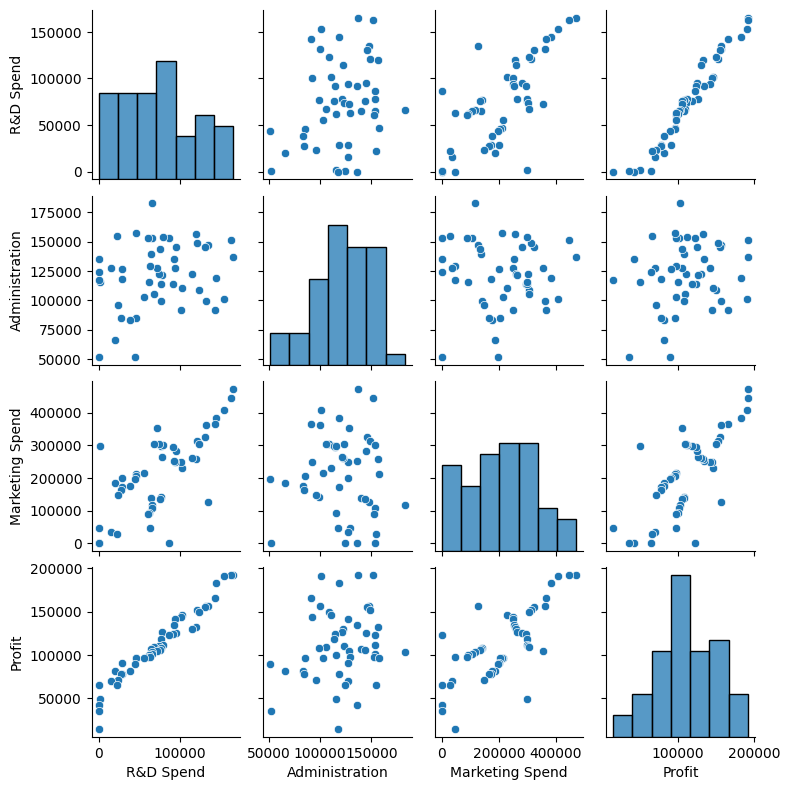

correlation analisys
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


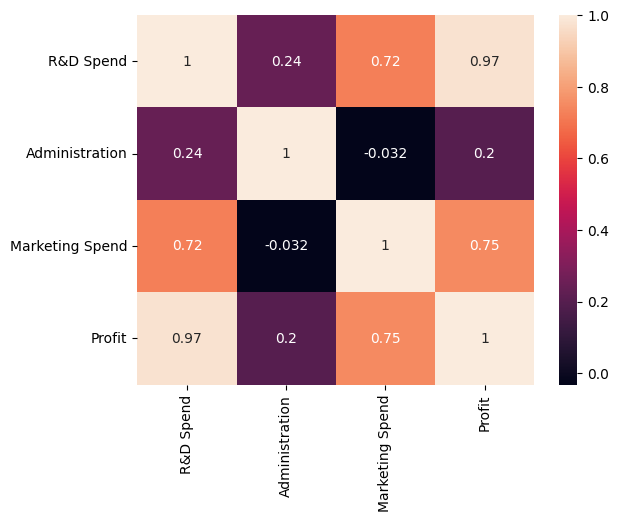

set the target
Coefficienti angolari (vettore):  [ 0.8161053  -0.02827606  0.04120791]  di cui la dimensione è  3
Intercetta (scalare secco):  46197.62467678645
proviamo il modello 
----------------------------------
scoring
----------------------------------
MAE:  7200.01600832298
MSE:  81946988.03279293
RMSE:  81946988.03279293
R2_score:  0.9425062682580387
Adjusted_R2_score:  0.9233416910107183
Integrated score:  0.9425062682580387


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
preview_window=2



path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Startup.csv"
print("preview dataset")
preview_window=2
df = pd.read_csv(path)
print(df.head(preview_window))
print(df.info())
print(df.describe().T)
sns.pairplot(df,height=2);
plt.show()


print("correlation analisys")
print(df.corr())
sns.heatmap(df.corr(),annot=True);
plt.show()

print("set the target")
TARGET = 'Profit'
X = df.drop(columns=[TARGET]) # is a Matrix
y = df[TARGET]

from sklearn.linear_model import LinearRegression # il modello
from sklearn.model_selection import train_test_split # per trattare i dati
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # per testaere il modello


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=667, ) # X,y as numpy dataframe are ok

model = LinearRegression()
model.fit(X_train,y_train)
print("Coefficienti angolari (vettore): ", model.coef_, " di cui la dimensione è " , len(model.coef_) ) # retta len 1, piano len 2 iperpiano len 3
print("Intercetta (scalare secco): ", model.intercept_) 

print("proviamo il modello ")
y_pred_test = model.predict(X_test)


print('----------------------------------')
print('Scoring')
print('----------------------------------')
mae = mean_absolute_error(y_test, y_pred_test) # metrica sempre con input y_test da dataset splittato
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test)
r2score = r2_score(y_test, y_pred_test)

# aggiustato
ad_r2score = 1-(1-r2score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1) # confrontare con variabili aggiustato

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2_score: ', r2score)
print('Adjusted_R2_score: ', ad_r2score)
print("Integrated score: ", model.score(X_test,y_test) )